## Analysis of Medicine taken by Patients Form in MrOS V1 Data (EDA3-V1-MU.ipynb)

The Medication Use Form provides a list of medications reported by the participants as well as start and stop dates of several different medications.

#### 1. [Installation of libraries](#eda_installation)
#### 2. [Renaming Columns](#eda_renaming)
#### 3. [All Medicine Taken](#eda_meds)
#### 4. [Descriptive Statistics and Visualizations](#eda_describe)

###  <a name = "eda_installation"></a>Installation Of Libraries

<a name = "eda_Installation of Libraries" ></a>

In [1]:
import pandas as pd
import numpy as np
import psycopg2
import sqlalchemy
import getpass
import seaborn as sns
import os
import csv


user = "dtfp3"
host = "pgsql.dsa.lan"
database = "casestdysu23t03"
password = getpass.getpass()
schema = "public" 

connectionstring = "postgresql://" + user + ":" + password + "@" + host + "/" + database

engine = sqlalchemy.create_engine(connectionstring)

connection = None

try:
    connection = engine.connect()
except Exception as err:
    print("An error has occurred trying to connect: {}".format(err))
    
del password

········


In [2]:
queryMU = "SELECT * FROM public.v1_form_mu"
form_MU = pd.read_sql_query(queryMU, con=connection)
form_MU

,ID,MUSTAFF,MUUSE,MUALPHA,MUANDRO,MUACE,MUARB,MUANTIAN,MUANTISP,MUASPIR,...,MUSTINT,MUFLUS,MUFLUP,MUCALS,MUCALP,MUBISS,MUBISP,MURALS,MURALP,MU
0,BI0001,BI01,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,None,None,None,None,None,None,None,None,1.0
1,BI0002,BI16,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,NaN,None,None,None,None,None,None,None,None,1.0
2,BI0003,BI01,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,None,None,None,None,None,None,None,None,1.0
3,BI0004,BI16,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,NaN,None,None,None,None,None,None,None,None,1.0
4,BI0005,BI01,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,None,None,None,None,None,None,None,None,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5989,SD9014,SD03,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,None,None,None,None,None,None,None,None,1.0
5990,SD9015,SD04,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,NaN,None,None,None,None,None,None,None,None,1.0
5991,SD9016,SD03,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,NaN,None,None,None,None,None,None,None,None,1.0
5992,SD9017,SD03,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,NaN,None,None,None,None,None,None,None,None,1.0


In [3]:
form_MU.shape

(5994, 71)

In [4]:
for col in form_MU:
    print(col)

ID
MUSTAFF
MUUSE
MUALPHA
MUANDRO
MUACE
MUARB
MUANTIAN
MUANTISP
MUASPIR
MUBENZO
MUBETA
MUCABLOK
MUCHOAN
MUCORTI
MUCORTO
MUCOXII
MUDILOOP
MUDIPOTA
MUDUITHX
MUGEM
MUH2RA
MUSTATIN
MUHYPOG
MUNARC
MUNITRA
MUNBAC
MUNSAIDS
MUPPUMP
MUSSRI
MUSILD
MUTHY
MUTRAZ
MUTCA
MUTEST
MUTESTFQ
MUTESTMO
MUTSDATE
MUASPR
MUACETA
MUIBU
MUNAPNA
MUMEDOST
MUFLU
MUFLUC
MUCAL
MUCALC
MUBIS
MUBISC
MUBSALEN
MUBSCLOD
MUBSETID
MUBSIBAN
MUBSPAMI
MUBSRISE
MUBSTILU
MUBSOTH
MURAL
MURALC
MUSTUDY
MUSTMED
MUSTINT
MUFLUS
MUFLUP
MUCALS
MUCALP
MUBISS
MUBISP
MURALS
MURALP
MU


Using the the Excel spreadsheet, we can import more descriptive headers

In [5]:
MUcolNames = pd.read_excel('/dsa/groups/casestudy2023su/team03/V1MU.xlsx').columns
MUcolNames

Index(['Id', 'STAFFID#FORMEDICATIONUSE', 'Prescriptmedforatleastpastmonth',
       'Alpha-blocker', 'Androgen', 'ACEInhibitor',
       'AngiotensionIIreceptorantagonist', 'Antiandrogen',
       'Antispasmodic,urinary', 'Aspirin', 'Benzodiazepine', 'Betablocker',
       'Calciumchannelblocker', 'Cholinergicagonist', 'Corticosteroid,inhaled',
       'Corticosteroid,oral', 'CoxIIinhibitor', 'Diruetic,loop',
       'Diruetic,potassium-sparing', 'Diruetic,thiazide', 'Gemfibrozil',
       'Histaminereceptorantagonist', 'HMGCoAreductaseinhibitor(statin)',
       'Hypoglycemicagents', 'Narcoticanalgesic', 'Nitrate',
       'Nonbenzodiazepineanticonvulsant', 'Nonsteroidalantiinflammatoryagent',
       'Protonpumpinhibitor', 'Selectiveserotoninreuptakeinhibitor',
       'Slidenafil', 'Thyroidhormone', 'Trazodone', 'Tricyclic',
       'Testosteroneinjectionsatleast1/mo', 'Howmanytimes/moreceivetestostinj',
       'Howmanymonthsreceivedtestostinj?', 'Dateoflasttestosteroneinjection?',
       'Take

### <a name="eda_renaming"></a>Renaming Columns

In [6]:
form_MU = form_MU.rename(columns=dict(zip(form_MU.columns, MUcolNames)))
form_MU

,Id,STAFFID#FORMEDICATIONUSE,Prescriptmedforatleastpastmonth,Alpha-blocker,Androgen,ACEInhibitor,AngiotensionIIreceptorantagonist,Antiandrogen,"Antispasmodic,urinary",Aspirin,...,Anyaddl.interventionsforstudy,startdate,stopdate,startdate.1,stopdate.1,startdate.2,stopdate.2,startdate.3,stopdate.3,FormIndicator
0,BI0001,BI01,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,None,None,None,None,None,None,None,None,1.0
1,BI0002,BI16,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,NaN,None,None,None,None,None,None,None,None,1.0
2,BI0003,BI01,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,None,None,None,None,None,None,None,None,1.0
3,BI0004,BI16,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,NaN,None,None,None,None,None,None,None,None,1.0
4,BI0005,BI01,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,None,None,None,None,None,None,None,None,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5989,SD9014,SD03,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,None,None,None,None,None,None,None,None,1.0
5990,SD9015,SD04,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,NaN,None,None,None,None,None,None,None,None,1.0
5991,SD9016,SD03,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,NaN,None,None,None,None,None,None,None,None,1.0
5992,SD9017,SD03,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,NaN,None,None,None,None,None,None,None,None,1.0


In [7]:
form_MU.shape

(5994, 71)

In [8]:
form_MU.dtypes

Id                                  object
STAFFID#FORMEDICATIONUSE            object
Prescriptmedforatleastpastmonth    float64
Alpha-blocker                      float64
Androgen                           float64
                                    ...   
startdate.2                         object
stopdate.2                          object
startdate.3                         object
stopdate.3                          object
FormIndicator                      float64
Length: 71, dtype: object

In [9]:
V1_meds = form_MU.iloc[:, [0, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25,
                           26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 38, 39, 40, 41, 42, 43, 45, 46, 47, 48, 49,
                           51, 53, 54, 56, 57, 59, 60, 61]]
v1_meds_final = form_MU.iloc[:, [0, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25,
                           26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 38, 39, 40, 41, 42, 43, 45, 46, 47, 48, 49,
                           51, 53, 54, 56, 57, 59, 60, 61]]

mu_with_nulls = form_MU
form_MU = form_MU.fillna(0.0)
form_MU.isna().sum()

Id                                 0
STAFFID#FORMEDICATIONUSE           0
Prescriptmedforatleastpastmonth    0
Alpha-blocker                      0
Androgen                           0
                                  ..
startdate.2                        0
stopdate.2                         0
startdate.3                        0
stopdate.3                         0
FormIndicator                      0
Length: 71, dtype: int64

In [10]:
form_MU.isna().sum().sum()

0

In [11]:
V1_meds.isna().sum().sum()

126330

In [12]:
#for col in V1_meds:
  
#    print(V1_meds[col].unique())
V1_meds = V1_meds.replace(to_replace=[1.0, 0.0], value =['yes', 'no'])


In [13]:
V1_meds.shape

(5994, 55)

### <a name="eda_describe"></a>Descriptive Statistics and Visualizations

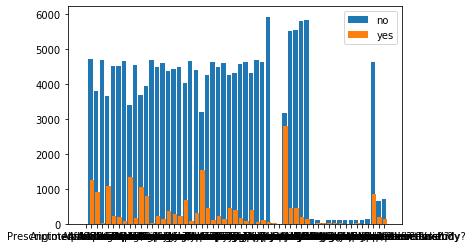

In [14]:
import matplotlib.pyplot as plt
from plotnine import *
import numpy as np
zeros = [V1_meds[column].value_counts()[0] for column in V1_meds.columns]
ones = [V1_meds[column].value_counts()[1] for column in V1_meds.columns]
n=len(V1_meds.columns)
plt.bar(np.arange(n)-0.1, zeros, label = 'no')
plt.bar(np.arange(n)+0.1, ones, label = 'yes')
plt.xticks(np.arange(n), V1_meds.columns)
plt.legend()
plt.show()

In [15]:
#print((V1_meds=='yes').sum())
print((V1_meds=='1').sum())

Id                                     0
Prescriptmedforatleastpastmonth        0
Alpha-blocker                          0
Androgen                               0
ACEInhibitor                           0
AngiotensionIIreceptorantagonist       0
Antiandrogen                           0
Antispasmodic,urinary                  0
Aspirin                                0
Benzodiazepine                         0
Betablocker                            0
Calciumchannelblocker                  0
Cholinergicagonist                     0
Corticosteroid,inhaled                 0
Corticosteroid,oral                    0
CoxIIinhibitor                         0
Diruetic,loop                          0
Diruetic,potassium-sparing             0
Diruetic,thiazide                      0
Gemfibrozil                            0
Histaminereceptorantagonist            0
HMGCoAreductaseinhibitor(statin)       0
Hypoglycemicagents                     0
Narcoticanalgesic                      0
Nitrate         

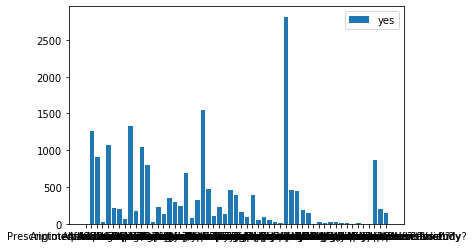

In [16]:

ones = [V1_meds[column].value_counts()[1] for column in V1_meds.columns]
n=len(V1_meds.columns)

plt.bar(np.arange(n)+0.1, ones, label = 'yes')
plt.xticks(np.arange(n), V1_meds.columns)
plt.legend()
plt.show()

create df with most commonly taken medicines and associated plots

In [17]:
V1_short = form_MU.iloc[:, [2, 3, 5, 9, 11, 12, 19, 23, 39, 60]]
V1_short

,Prescriptmedforatleastpastmonth,Alpha-blocker,ACEInhibitor,Aspirin,Betablocker,Calciumchannelblocker,"Diruetic,thiazide",Hypoglycemicagents,Takeacetaminophenatleast3x/week,Takinganymedicationforthisstudy?
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
5989,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5990,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
5991,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
5992,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0


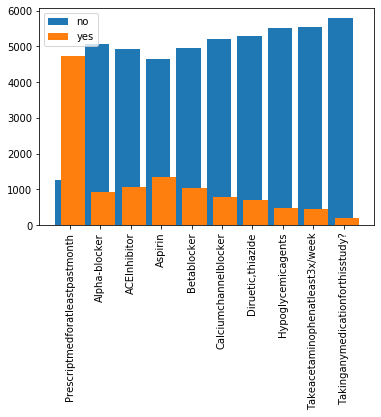

In [18]:
zeros = [V1_short[column].value_counts()[0] for column in V1_short.columns]
ones = [V1_short[column].value_counts()[1] for column in V1_short.columns]
n=len(V1_short.columns)
plt.bar(np.arange(n)-0.1, zeros, label = 'no')
plt.bar(np.arange(n)+0.1, ones, label = 'yes')
plt.xticks(np.arange(n), V1_short.columns, rotation='vertical')

plt.legend()
plt.show()

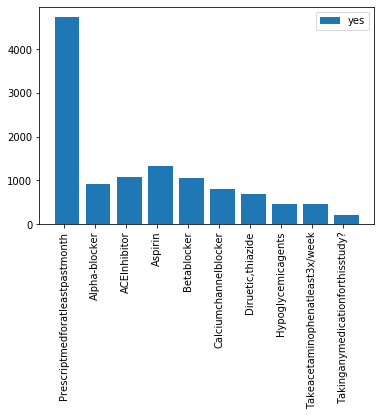

In [19]:

ones = [V1_short[column].value_counts()[1] for column in V1_short.columns]
n=len(V1_short.columns)

plt.bar(np.arange(n)+0.1, ones, label = 'yes')
plt.xticks(np.arange(n), V1_short.columns, rotation='vertical')

plt.legend()
plt.show()

In [20]:
V1_meds.isna().sum()

Id                                        0
Prescriptmedforatleastpastmonth           0
Alpha-blocker                          1261
Androgen                               1261
ACEInhibitor                           1261
AngiotensionIIreceptorantagonist       1261
Antiandrogen                           1261
Antispasmodic,urinary                  1261
Aspirin                                1261
Benzodiazepine                         1261
Betablocker                            1261
Calciumchannelblocker                  1261
Cholinergicagonist                     1261
Corticosteroid,inhaled                 1261
Corticosteroid,oral                    1261
CoxIIinhibitor                         1261
Diruetic,loop                          1261
Diruetic,potassium-sparing             1261
Diruetic,thiazide                      1261
Gemfibrozil                            1261
Histaminereceptorantagonist            1261
HMGCoAreductaseinhibitor(statin)       1261
Hypoglycemicagents              

In [21]:

V1_meds = V1_meds.fillna(0)
V1_med = V1_meds.drop(V1_meds.columns[[0, 34, 35, 36]], axis=1)
for col in V1_meds:
  
    print(V1_meds[col].unique())


['BI0001' 'BI0002' 'BI0003' ... 'SD9016' 'SD9017' 'SD9018']
['yes' 'no']
['no' 0 'yes']
['no' 'yes' 0]
['no' 0 'yes']
['no' 0 'yes']
['no' 0 'yes']
['no' 0 'yes']
['no' 0 'yes']
['no' 'yes' 0]
['no' 0 'yes']
['no' 0 'yes']
['no' 0 'yes']
['no' 0 'yes']
['no' 0 'yes']
['no' 0 'yes']
['no' 0 'yes']
['no' 0 'yes']
['no' 0 'yes']
['no' 0 'yes']
['no' 0 'yes']
['no' 'yes' 0]
['no' 0 'yes']
['no' 0 'yes']
['no' 0 'yes']
['yes' 'no' 0]
['no' 0 'yes']
['yes' 'no' 0]
['no' 0 'yes']
['no' 0 'yes']
['no' 0 'yes']
['no' 0 'yes']
['no' 0 'yes']
['no' 'yes']
[0 'yes' 2.0 4.0 3.0]
[0 6.0 36.0 24.0 12.0 120.0 384.0 'yes' 2.0 60.0 48.0 72.0 18.0 17.0 13.0
 96.0 5.0 4.0 3.0 276.0 40.0 15.0 84.0 10.0]
['yes' 'no']
['no' 'yes']
['no' 'yes']
['no' 'yes']
['no' 'yes']
[0 'no' 'yes']
[0 'no' 'yes']
[0 'yes' 'no']
[0 'yes' 'no']
[0 'yes' 'no']
[0 'no' 'yes']
[0 'yes' 'no']
[0 'no' 'yes']
[0 'no' 'yes']
[0 'no' 'yes']
[0 'no' 'yes']
[0 'no' 'yes']
[0 'no' 'yes']
[0 'no' 'yes']


In [22]:
V1_meds.columns

Index(['Id', 'Prescriptmedforatleastpastmonth', 'Alpha-blocker', 'Androgen',
       'ACEInhibitor', 'AngiotensionIIreceptorantagonist', 'Antiandrogen',
       'Antispasmodic,urinary', 'Aspirin', 'Benzodiazepine', 'Betablocker',
       'Calciumchannelblocker', 'Cholinergicagonist', 'Corticosteroid,inhaled',
       'Corticosteroid,oral', 'CoxIIinhibitor', 'Diruetic,loop',
       'Diruetic,potassium-sparing', 'Diruetic,thiazide', 'Gemfibrozil',
       'Histaminereceptorantagonist', 'HMGCoAreductaseinhibitor(statin)',
       'Hypoglycemicagents', 'Narcoticanalgesic', 'Nitrate',
       'Nonbenzodiazepineanticonvulsant', 'Nonsteroidalantiinflammatoryagent',
       'Protonpumpinhibitor', 'Selectiveserotoninreuptakeinhibitor',
       'Slidenafil', 'Thyroidhormone', 'Trazodone', 'Tricyclic',
       'Testosteroneinjectionsatleast1/mo', 'Howmanytimes/moreceivetestostinj',
       'Howmanymonthsreceivedtestostinj?', 'Takeaspirinatleast3x/week',
       'Takeacetaminophenatleast3x/week', 'Takeibuprof

 ### <a name="eda_meds"></a>All Medicine Taken

In [23]:


V1_meds2 = form_MU[[
       'Alpha-blocker', 'Androgen', 'ACEInhibitor',
       'AngiotensionIIreceptorantagonist', 'Antiandrogen',
       'Antispasmodic,urinary', 'Aspirin', 'Benzodiazepine', 'Betablocker',
       'Calciumchannelblocker', 'Cholinergicagonist', 'Corticosteroid,inhaled',
       'Corticosteroid,oral', 'CoxIIinhibitor', 'Diruetic,loop',
       'Diruetic,potassium-sparing', 'Diruetic,thiazide', 'Gemfibrozil',
       'Histaminereceptorantagonist', 'HMGCoAreductaseinhibitor(statin)',
       'Hypoglycemicagents', 'Narcoticanalgesic', 'Nitrate',
       'Nonbenzodiazepineanticonvulsant', 'Nonsteroidalantiinflammatoryagent',
       'Protonpumpinhibitor', 'Selectiveserotoninreuptakeinhibitor',
       'Slidenafil', 'Thyroidhormone', 'Trazodone', 'Tricyclic',
       'Testosteroneinjectionsatleast1/mo', 
       'Takeaspirinatleast3x/week', 'Takeacetaminophenatleast3x/week',
       'Takeibuprofinatleast3x/week', 'Takenaproxensodiumatleast3x/week',
       'Haveyouevertakenosteoporosismeds', 'Haveyouevertakenfluoride?',
       'Haveyouevertakencalcitonin?',
       'Haveyouevertakenbisphosphates?',
       'Alendronateevertaken',
       'Etidronateevertaken', 
       'Pamidronateevertaken', 'Risedronateevertaken', 
       'Other/dontknowbisphophevertaken?', 'Haveyouevertakenraloxifene?',
       'Inanotherclinical/medicaltrial?',
       'Takinganymedicationforthisstudy?', 'Anyaddl.interventionsforstudy']]


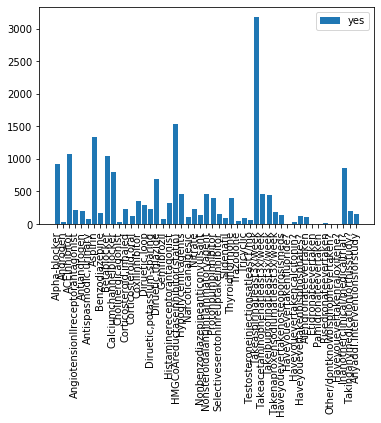

In [24]:

ones = [V1_meds2[column].value_counts()[1] for column in V1_meds2.columns]
n=len(V1_meds2.columns)

plt.bar(np.arange(n)+0.1, ones, label = 'yes')
plt.xticks(np.arange(n), V1_meds2.columns, rotation='vertical')

plt.legend()
plt.show()

In [25]:
# Define the file path and name
file_path = "/dsa/groups/casestudy2023su/team03/model_data/MU_results.csv"

# Export the DataFrame to CSV
v1_meds_final.to_csv(file_path, index=False)

# Set file permissions to 777
##os.chmod(file_path, 0o777)

file_path_with_nulls = "/dsa/groups/casestudy2023su/team03/model_data/null_included/MU_results_with_nulls.csv"
mu_with_nulls.to_csv(file_path_with_nulls, index=False)
os.chmod(file_path_with_nulls, 0o777)

print("DataFrame exported to CSV with 777 permissions successfully!")

DataFrame exported to CSV with 777 permissions successfully!
